In [ ]:
#importing neccesaary modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [40]:
df = pd.read_csv('./Datasets/Mall Dataset/Mall_Customers.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


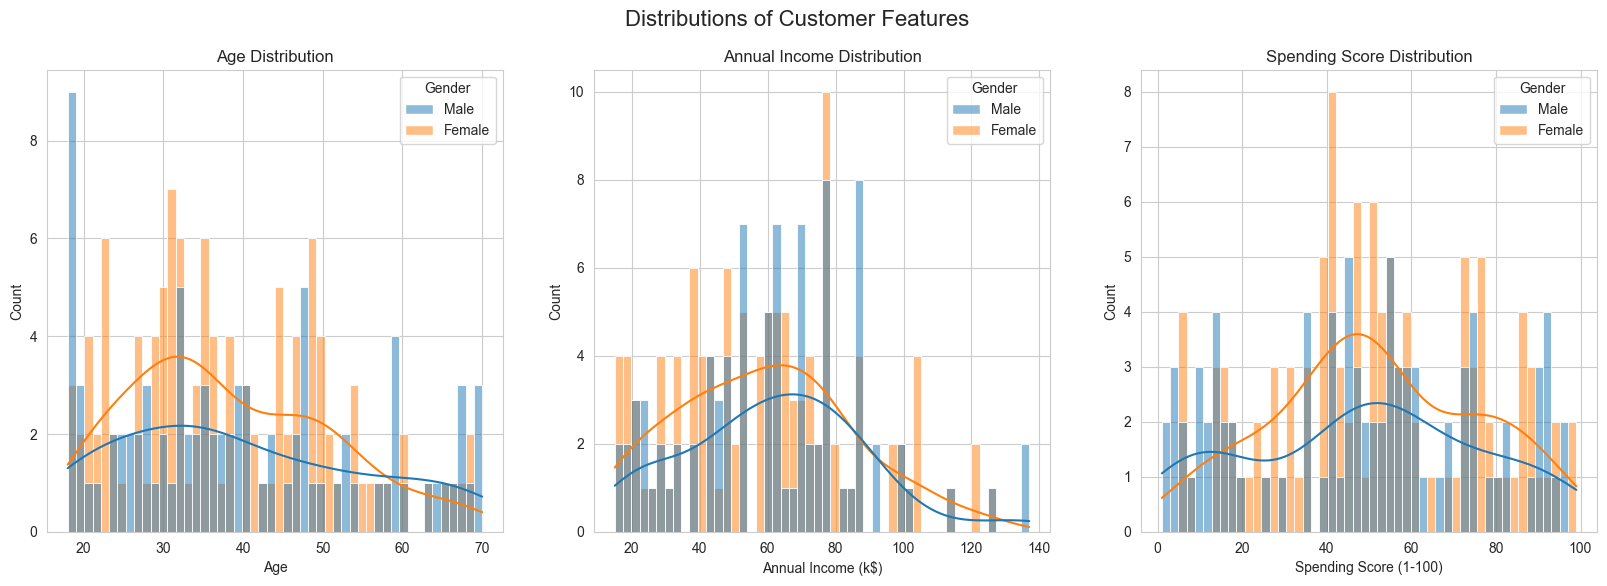

In [42]:
# Univariate analysis
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data = df, x='Age', kde=True, hue='Gender', bins=50).set_title('Age Distribution')
sns.histplot(ax=axes[1], data = df, x='Annual Income (k$)', kde=True, hue='Gender', bins=50).set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data = df, x='Spending Score (1-100)', kde=True, hue='Gender', bins=50).set_title('Spending Score Distribution')
plt.show()

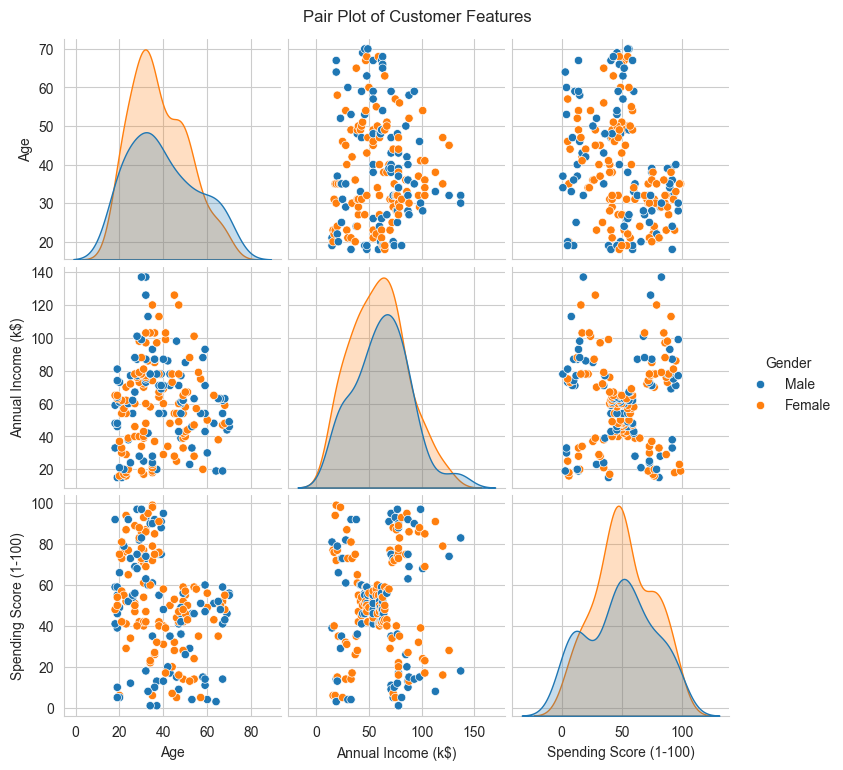

In [43]:
# Bivariate analyis
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender',diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [44]:
# 3D visualisations
import plotly.io as pio
fig = px.scatter_3d(df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',
                    color='Gender',
                    title='3D View of Customer Data')

pio.renderers.default = "vscode"
fig.show()

In [45]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

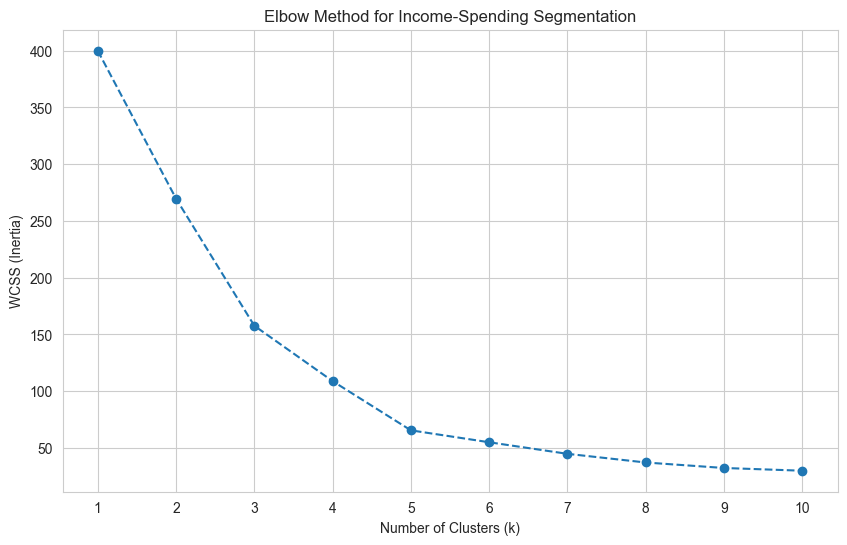

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [46]:
# Elbow Method
# select and scale rhe features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# implement the method
wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

#buiild the model using 5clusters calc from above and predict
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_cluster'] = kmeans1.fit_predict(X1_scaled)
df.head()



In [47]:
df['Income_cluster'].value_counts()

Income_cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

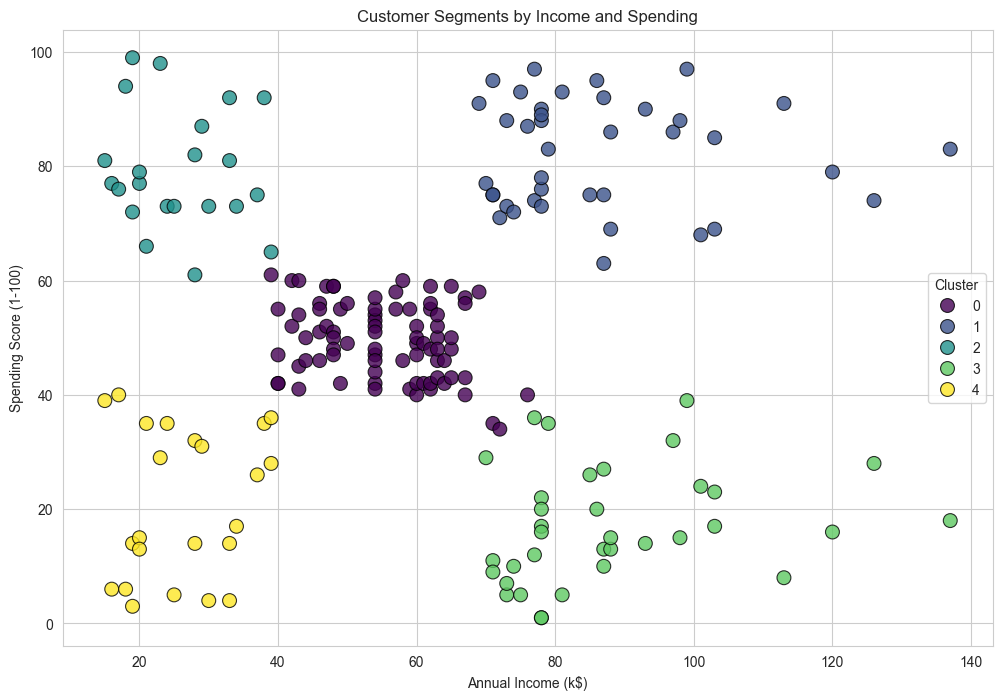

In [48]:
# visulising
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [49]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_cluster'].value_counts()
cluster_profiles1

,Age,Annual Income (k$),Spending Score (1-100),Size
Income_cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


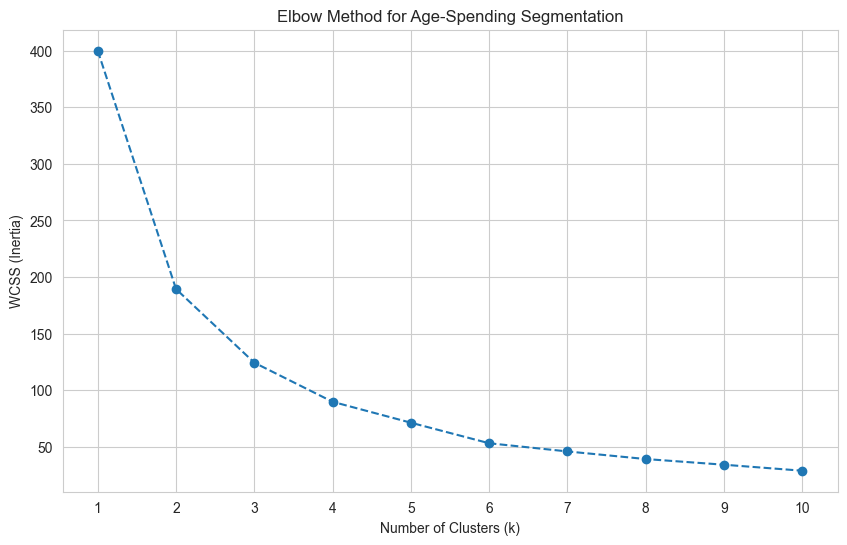

In [50]:
# model-2 : age & spending score
X2 = df[['Age', 'Spending Score (1-100)']]
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# implement the method
wcss2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()




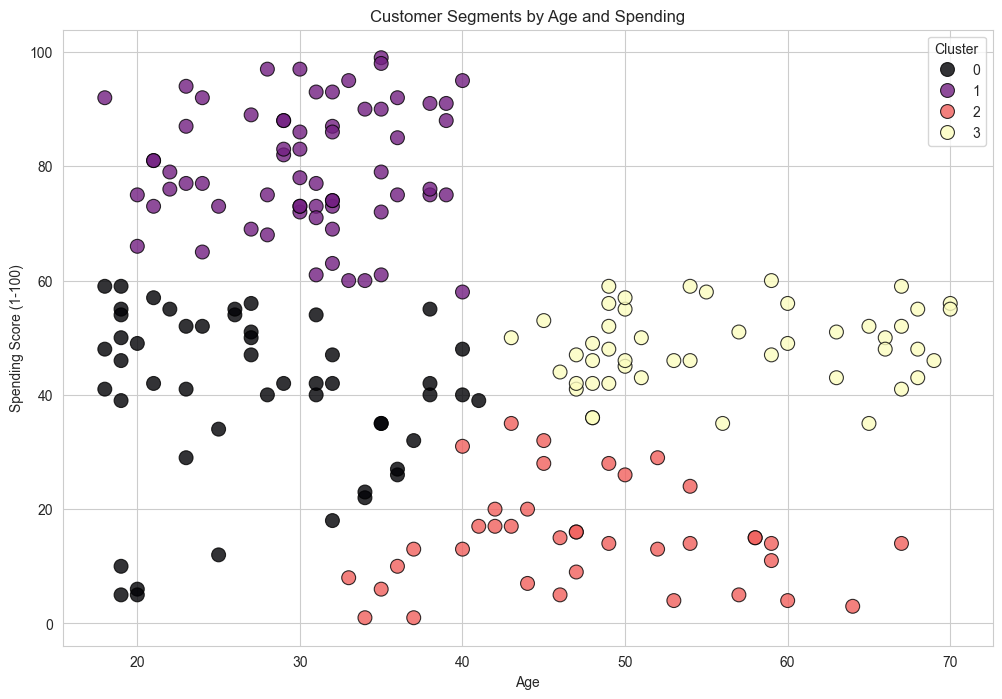

In [51]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

#### SUBMISSION Q's

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Age_Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,0


Part-1 : Explore Gender vs. Spending Score

In [53]:
df.groupby('Gender')['Spending Score (1-100)'].median().round(2)

Gender
Female    50.0
Male      50.0
Name: Spending Score (1-100), dtype: float64

In [54]:
df.groupby('Gender')['Spending Score (1-100)'].mean().round(2)

Gender
Female    51.53
Male      48.51
Name: Spending Score (1-100), dtype: float64

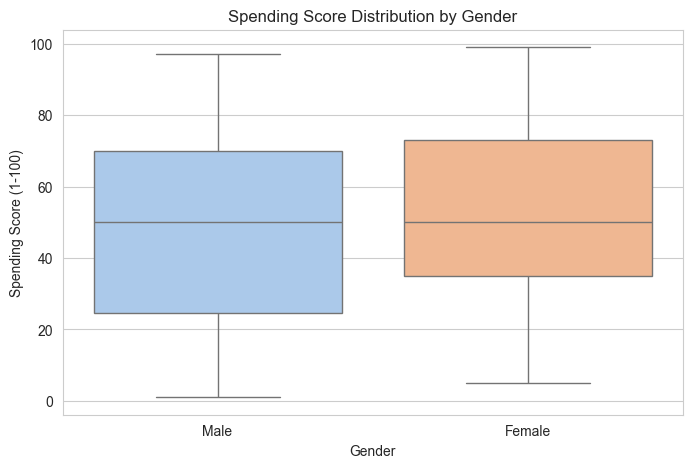

In [62]:
# visualising
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='pastel', hue='Gender' )
plt.title('Spending Score Distribution by Gender')
plt.show()


#### Summary

- **1-** mean for both males and females are very similar and medians are equal of both genders

- **2-** most customers of both genders fall within similar spending group

- **3-** Males exhibit a slightly wider spread toward lower spending values than females, indicating more variability at the lower end.

Part-2 : Apply Feature Engineering for Clustering

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Age_Cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,0


In [57]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income_cluster', 'Age_Cluster'],
      dtype='object')

In [58]:
df['Savings'] = df['Annual Income (k$)'] - df['Spending Score (1-100)']

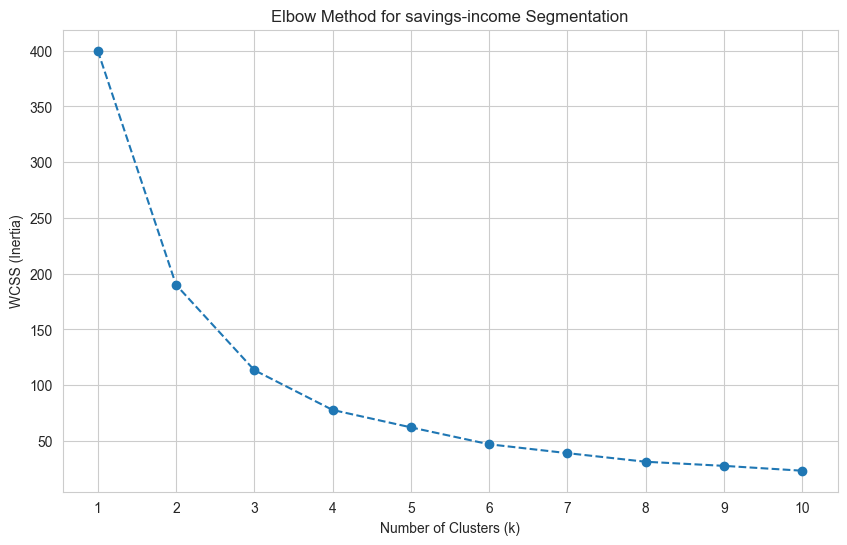

In [59]:
X3 = df[['Savings', 'Annual Income (k$)']]
X3_scaled = scaler.fit_transform(X3)

# elbow method 
wcss3 = []
for i in range(1,11):
    kmean = KMeans(init='k-means++', random_state=42, n_clusters=i, n_init=10)
    kmean.fit(X3_scaled)
    wcss3.append(kmean.inertia_)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for savings-income Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

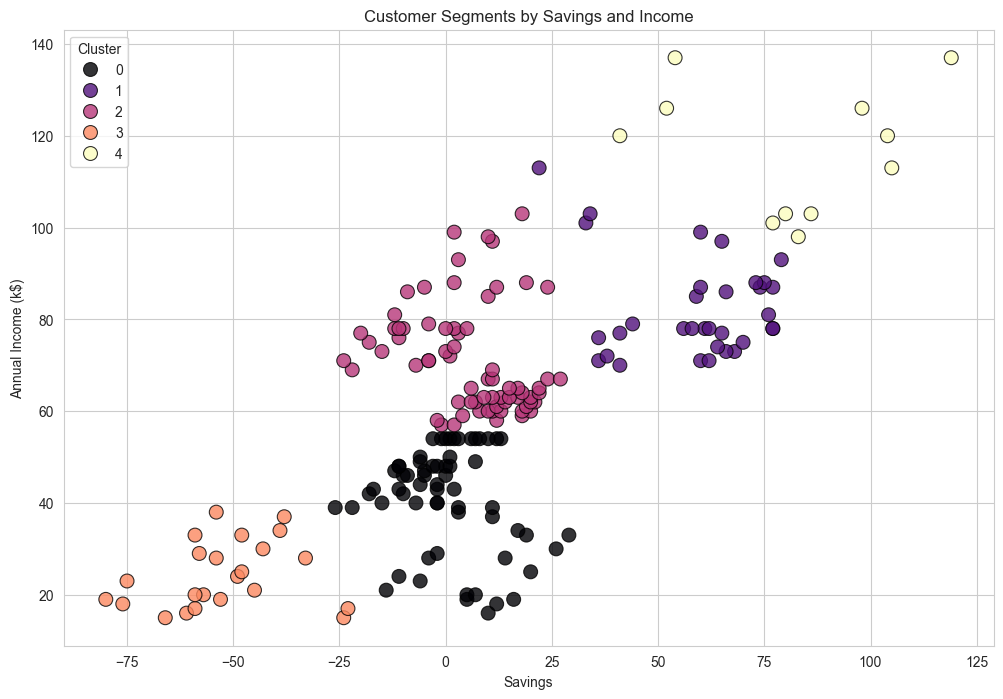

In [60]:
# build the final model using 5 cluster 
# Build and fit the final model for age segmentation
kmeans3 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Savings_Cluster'] = kmeans3.fit_predict(X3_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Savings', y='Annual Income (k$)',
                hue='Savings_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Savings and Income')
plt.legend(title='Cluster')
plt.show()

#### Savings based personas and strategy

- **Cluster 0 (Low to Mid Income, Low or Negative Savings)** : At-Risk Spenders -> Higher churn risk

- **Cluster 1 (High Income, High Savings)**  : Premium Savers -> Ideal for premium, long-term products (investments, loyalty programs)

- **Cluster 2 (Mid to High Income, Moderate Savings)**  : Balanced Customers -> Good candidates for upselling

- **Cluster 3 (Low Income, Negative Savings)**  : Vulnerable Customers -> Focus on budget-friendly offerings, Not ideal for aggressive upselling

- **Cluster 4 (Very High Income, Moderate–High Savings)**  : Elite Customers -> Excellent targets for exclusive offers